In [1]:
import numpy as np 
import pandas as pd 

from sklearn import preprocessing
import matplotlib.pyplot as plt 
plt.rc("font", size=14)
import seaborn as sns
sns.set(style="white") #white background style for seaborn plots
sns.set(style="whitegrid", color_codes=True)

In [2]:
# get titanic & test csv files as a DataFrame

#developmental data (train)
titanic_df = pd.read_csv("train.csv")

#cross validation data (hold-out testing)
test_df    = pd.read_csv("test.csv")

# preview developmental data
titanic_df.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
test_df.head(5)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [4]:
# check missing values in train dataset
titanic_df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [5]:
sum(pd.isnull(titanic_df['Age']))

177

In [6]:
# proportion of "Age" missing
round(177/(len(titanic_df["PassengerId"])),4)

0.1987

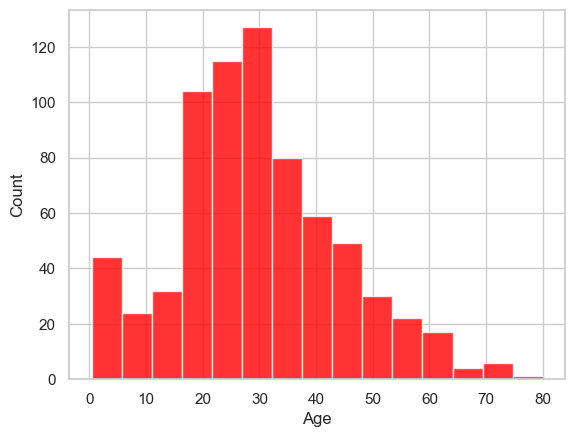

In [7]:
ax = titanic_df["Age"].hist(bins=15, color='Red', alpha=0.8)
ax.set(xlabel='Age', ylabel='Count')
plt.show()

In [8]:
# median age is 28 (as compared to mean which is ~30)
titanic_df["Age"].median(skipna=True)

28.0

In [9]:
# proportion of "cabin" missing
round(687/len(titanic_df["PassengerId"]),4)

0.771

In [10]:
# proportion of "Embarked" missing
round(2/len(titanic_df["PassengerId"]),4)

0.0022

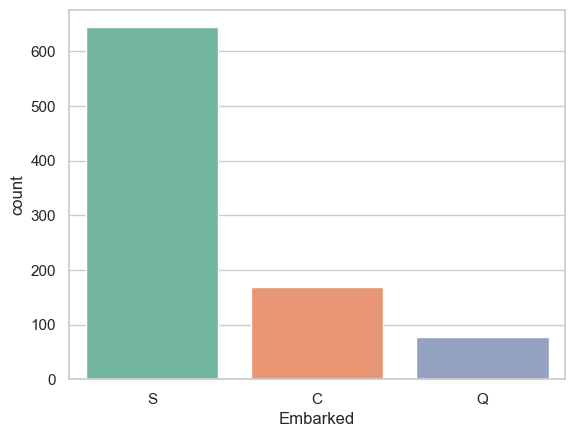

In [11]:
sns.countplot(x='Embarked',data=titanic_df,palette='Set2')
plt.show()

In [12]:
train_data = titanic_df
train_data["Age"].fillna(28, inplace=True)
train_data["Embarked"].fillna("S", inplace=True)
train_data.drop('Cabin', axis=1, inplace=True)

In [13]:
## Create categorical variable for traveling alone

train_data['TravelBuds']=train_data["SibSp"]+train_data["Parch"]
train_data['TravelAlone']=np.where(train_data['TravelBuds']>0, 0, 1)

In [14]:
train_data.drop('SibSp', axis=1, inplace=True)
train_data.drop('Parch', axis=1, inplace=True)
train_data.drop('TravelBuds', axis=1, inplace=True)

In [15]:
#create categorical variable for Pclass

train2 = pd.get_dummies(train_data, columns=["Pclass"])

In [16]:
train3 = pd.get_dummies(train2, columns=["Embarked"])

In [191]:
train4=pd.get_dummies(train3, columns=["Sex"])
train4.drop('Sex_female', axis=1, inplace=True)

In [192]:
train4.drop('PassengerId', axis=1, inplace=True)
train4.drop('Name', axis=1, inplace=True)
train4.drop('Ticket', axis=1, inplace=True)
train4.head(5)

,Survived,Age,Fare,TravelAlone,Pclass_1,Pclass_2,Pclass_3,Embarked_C,Embarked_Q,Embarked_S,Sex_male
0,0,22.0,7.2500,0,False,False,True,False,False,True,True
1,1,38.0,71.2833,0,True,False,False,True,False,False,False
2,1,26.0,7.9250,1,False,False,True,False,False,True,False
3,1,35.0,53.1000,0,True,False,False,False,False,True,False
4,0,35.0,8.0500,1,False,False,True,False,False,True,True


In [193]:
df_final = train4

In [194]:
test_df["Age"].fillna(28, inplace=True)
test_df["Fare"].fillna(14.45, inplace=True)
test_df.drop('Cabin', axis=1, inplace=True)

In [195]:
test_df['TravelBuds']=test_df["SibSp"]+test_df["Parch"]
test_df['TravelAlone']=np.where(test_df['TravelBuds']>0, 0, 1)

test_df.drop('SibSp', axis=1, inplace=True)
test_df.drop('Parch', axis=1, inplace=True)
test_df.drop('TravelBuds', axis=1, inplace=True)

test2 = pd.get_dummies(test_df, columns=["Pclass"])
test3 = pd.get_dummies(test2, columns=["Embarked"])

test4=pd.get_dummies(test3, columns=["Sex"])
test4.drop('Sex_female', axis=1, inplace=True)

test4.drop('PassengerId', axis=1, inplace=True)
test4.drop('Name', axis=1, inplace=True)
test4.drop('Ticket', axis=1, inplace=True)
final_test = test4

In [196]:
final_test.head(5)

,Age,Fare,TravelAlone,Pclass_1,Pclass_2,Pclass_3,Embarked_C,Embarked_Q,Embarked_S,Sex_male
0,34.5,7.8292,1,False,False,True,False,True,False,True
1,47.0,7.0000,0,False,False,True,False,False,True,False
2,62.0,9.6875,1,False,True,False,False,True,False,True
3,27.0,8.6625,1,False,False,True,False,False,True,True
4,22.0,12.2875,0,False,False,True,False,False,True,False


C:\Users\bstafford\AppData\Local\Temp\ipykernel_13368\2268345644.py:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(titanic_df["Age"][df_final.Survived == 1], color="darkturquoise", shade=True)
C:\Users\bstafford\AppData\Local\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\bstafford\AppData\Local\Temp\ipykernel_13368\2268345644.py:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(titanic_df["Age"][df_final.Survived == 0], color="lightcoral", shade=True)
C:\Users\bstafford\AppData\Local\anaconda3\Lib\site-packages\seaborn\_oldcore.py:

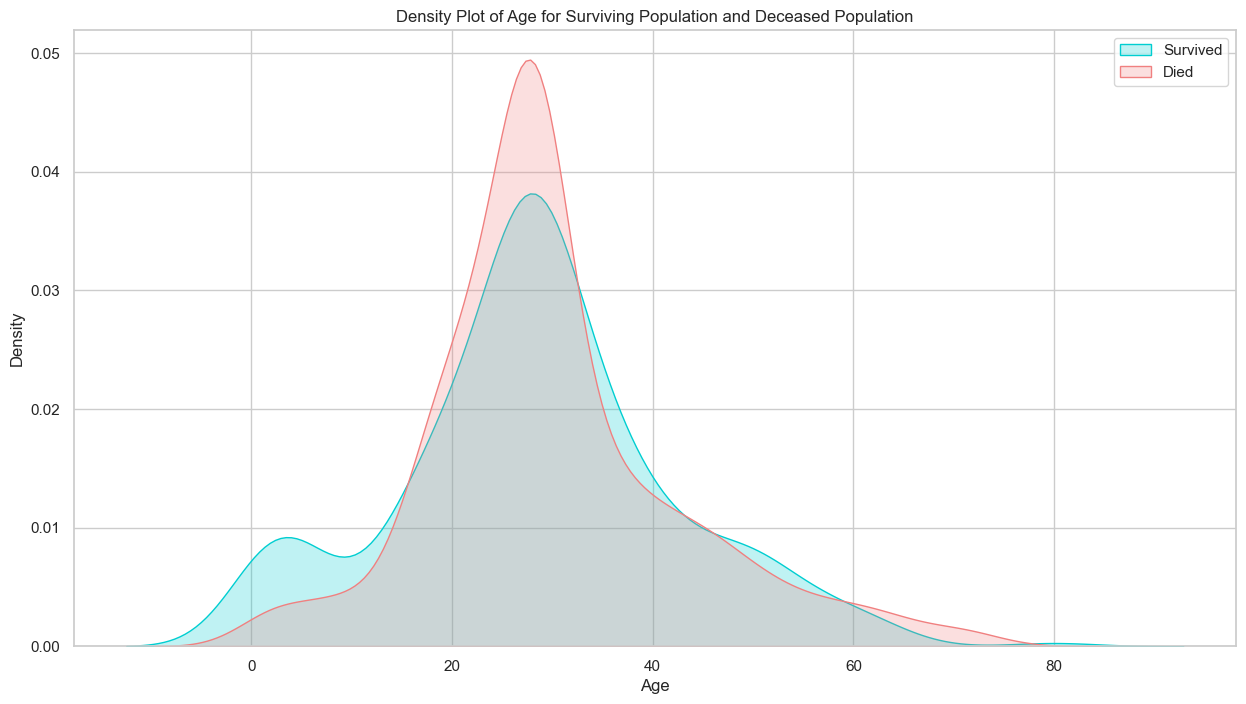

In [197]:
plt.figure(figsize=(15,8))
sns.kdeplot(titanic_df["Age"][df_final.Survived == 1], color="darkturquoise", shade=True)
sns.kdeplot(titanic_df["Age"][df_final.Survived == 0], color="lightcoral", shade=True)
plt.legend(['Survived', 'Died'])
plt.title('Density Plot of Age for Surviving Population and Deceased Population')
plt.show()

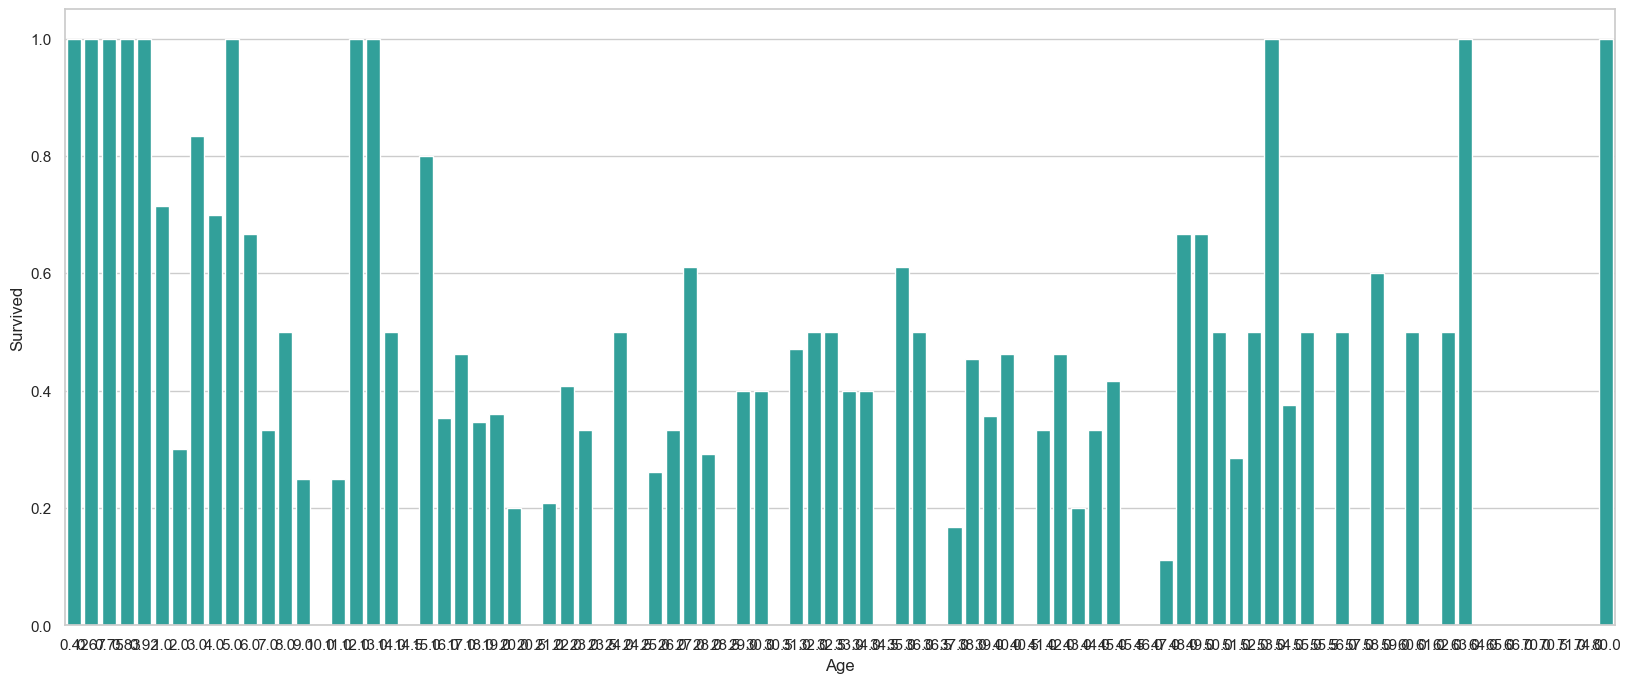

In [198]:
plt.figure(figsize=(20,8))
avg_survival_byage = df_final[["Age", "Survived"]].groupby(['Age'],as_index=False).mean()
g = sns.barplot(x='Age', y='Survived', data=avg_survival_byage, color="LightSeaGreen")

In [199]:
df_final['IsMinor']=np.where(train_data['Age']<=16, 1, 0)

In [200]:
final_test['IsMinor']=np.where(final_test['Age']<=16, 1, 0)

C:\Users\bstafford\AppData\Local\Temp\ipykernel_13368\1880621088.py:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df_final["Fare"][titanic_df.Survived == 1], color="darkturquoise", shade=True)
C:\Users\bstafford\AppData\Local\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\bstafford\AppData\Local\Temp\ipykernel_13368\1880621088.py:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df_final["Fare"][titanic_df.Survived == 0], color="lightcoral", shade=True)
C:\Users\bstafford\AppData\Local\anaconda3\Lib\site-packages\seaborn\_oldcore.p

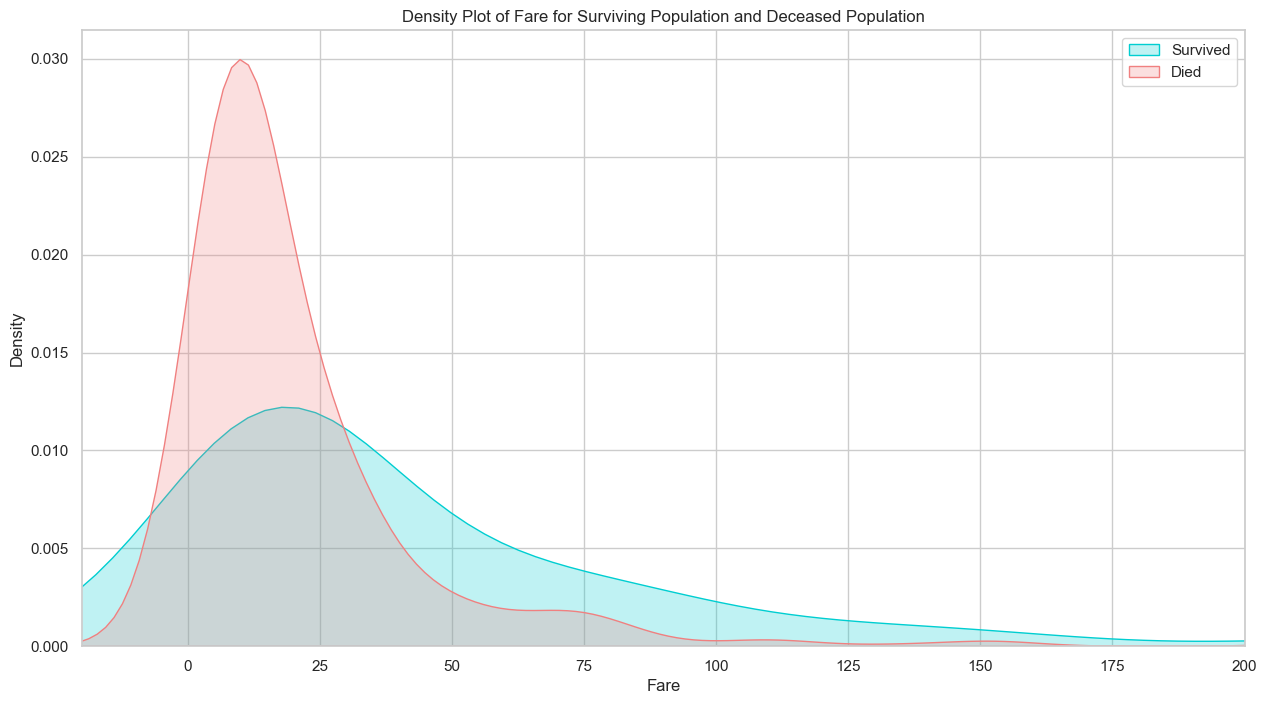

In [201]:
plt.figure(figsize=(15,8))
sns.kdeplot(df_final["Fare"][titanic_df.Survived == 1], color="darkturquoise", shade=True)
sns.kdeplot(df_final["Fare"][titanic_df.Survived == 0], color="lightcoral", shade=True)
plt.legend(['Survived', 'Died'])
plt.title('Density Plot of Fare for Surviving Population and Deceased Population')
# limit x axis to zoom on most information. there are a few outliers in fare. 
plt.xlim(-20,200)
plt.show()

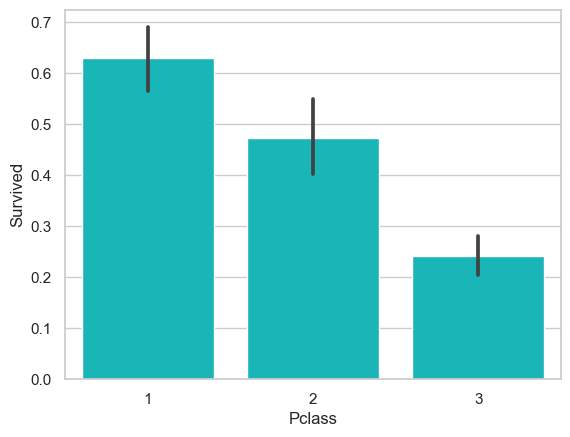

In [202]:
sns.barplot(x='Pclass', y='Survived', data=titanic_df, color="darkturquoise")
plt.show()

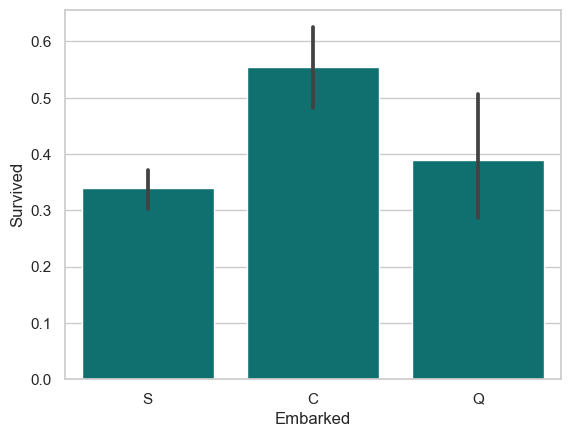

In [203]:
sns.barplot(x='Embarked', y='Survived', data=titanic_df, color="teal")
plt.show()

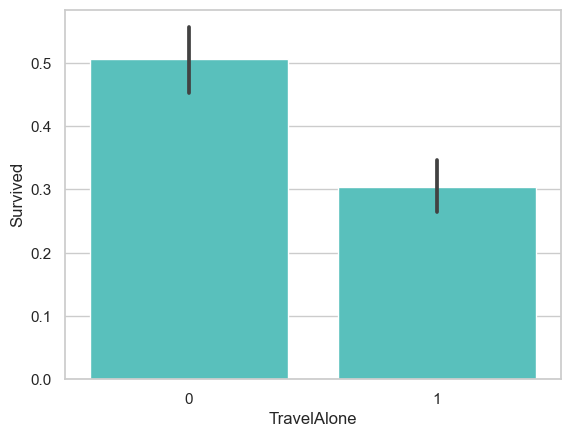

In [204]:
sns.barplot(x='TravelAlone', y='Survived', data=df_final, color="mediumturquoise")
plt.show()

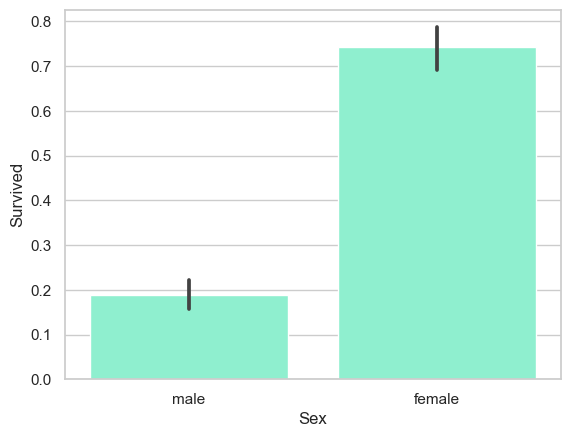

In [205]:
sns.barplot(x='Sex', y='Survived', data=titanic_df, color="aquamarine")
plt.show()

In [206]:
df_final.head(10)

,Survived,Age,Fare,TravelAlone,Pclass_1,Pclass_2,Pclass_3,Embarked_C,Embarked_Q,Embarked_S,Sex_male,IsMinor
0,0,22.0,7.2500,0,False,False,True,False,False,True,True,0
1,1,38.0,71.2833,0,True,False,False,True,False,False,False,0
2,1,26.0,7.9250,1,False,False,True,False,False,True,False,0
3,1,35.0,53.1000,0,True,False,False,False,False,True,False,0
4,0,35.0,8.0500,1,False,False,True,False,False,True,True,0
5,0,28.0,8.4583,1,False,False,True,False,True,False,True,0
6,0,54.0,51.8625,1,True,False,False,False,False,True,True,0
7,0,2.0,21.0750,0,False,False,True,False,False,True,True,1
8,1,27.0,11.1333,0,False,False,True,False,False,True,False,0
9,1,14.0,30.0708,0,False,True,False,True,False,False,False,1


In [207]:
cols=["Age", "Fare", "TravelAlone", "Pclass_1", "Pclass_2","Embarked_C","Embarked_S","Sex_male","IsMinor"] 
X=df_final[cols]
Y=df_final['Survived']

In [208]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
from scipy import stats

# Convert data to numpy arrays
Y = np.asarray(Y).astype(np.float64)
X = np.asarray(X).astype(np.float64)

# Ensure there are no NaN values
Y = np.nan_to_num(Y)
X = np.nan_to_num(X)

# Create the Logit model
logit_model = sm.Logit(Y, X)
result = logit_model.fit()

# Print the summary
print(result.summary())


Optimization terminated successfully.
         Current function value: 0.450348
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:                      y   No. Observations:                  891
Model:                          Logit   Df Residuals:                      882
Method:                           MLE   Df Model:                            8
Date:                Mon, 10 Jun 2024   Pseudo R-squ.:                  0.3237
Time:                        11:09:03   Log-Likelihood:                -401.26
converged:                       True   LL-Null:                       -593.33
Covariance Type:            nonrobust   LLR p-value:                 4.627e-78
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
x1            -0.0096      0.007     -1.372      0.170      -0.023       0.004
x2             0.0018      0.

In [209]:
print(df_final[cols2].dtypes)
print(df_final['Survived'].dtype)

Age           float64
Pclass_1         bool
Pclass_2         bool
Embarked_C       bool
Embarked_S       bool
Sex_male         bool
dtype: object
int64


In [210]:
# Convert columns to numeric
df_final[cols2] = df_final[cols2].apply(pd.to_numeric, errors='coerce')
df_final['Survived'] = pd.to_numeric(df_final['Survived'], errors='coerce')

# Check for NaN values and handle them
print(df_final[cols2].isnull().sum())
print(df_final['Survived'].isnull().sum())

# Optionally, fill NaN values with a suitable value, e.g., 0 or the mean
df_final[cols2] = df_final[cols2].fillna(0)
df_final['Survived'] = df_final['Survived'].fillna(0)


Age           0
Pclass_1      0
Pclass_2      0
Embarked_C    0
Embarked_S    0
Sex_male      0
dtype: int64
0


In [211]:
import pandas as pd
import numpy as np
import statsmodels.api as sm

# Ensure all columns are numeric
for col in cols2:
    df_final[col] = pd.to_numeric(df_final[col], errors='coerce')
df_final['Survived'] = pd.to_numeric(df_final['Survived'], errors='coerce')

# Check for NaN values and handle them
print(df_final[cols2].isnull().sum())
print(df_final['Survived'].isnull().sum())

# Optionally, fill NaN values with a suitable value, e.g., 0 or the mean
df_final[cols2] = df_final[cols2].fillna(0)
df_final['Survived'] = df_final['Survived'].fillna(0)

# Define the predictors and response
X2 = df_final[cols2]
Y = df_final['Survived']

# Convert to numpy arrays
X2 = np.asarray(X2).astype(np.float64)
Y = np.asarray(Y).astype(np.float64)

# Create and fit the Logit model
logit_model = sm.Logit(Y, X2)
result = logit_model.fit()

# Print the summary
print(result.summary())


Age           0
Pclass_1      0
Pclass_2      0
Embarked_C    0
Embarked_S    0
Sex_male      0
dtype: int64
0
Optimization terminated successfully.
         Current function value: 0.458585
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:                      y   No. Observations:                  891
Model:                          Logit   Df Residuals:                      885
Method:                           MLE   Df Model:                            5
Date:                Mon, 10 Jun 2024   Pseudo R-squ.:                  0.3113
Time:                        11:09:03   Log-Likelihood:                -408.60
converged:                       True   LL-Null:                       -593.33
Covariance Type:            nonrobust   LLR p-value:                 1.131e-77
                 coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------

In [212]:
print(X2)
print(Y)
print(type(X2))
print(type(Y))


[[22.  0.  0.  0.  1.  1.]
 [38.  1.  0.  1.  0.  0.]
 [26.  0.  0.  0.  1.  0.]
 ...
 [28.  0.  0.  0.  1.  0.]
 [26.  1.  0.  1.  0.  1.]
 [32.  0.  0.  0.  0.  1.]]
[0. 1. 1. 1. 0. 0. 0. 0. 1. 1. 1. 1. 0. 0. 0. 1. 0. 1. 0. 1. 0. 1. 1. 1.
 0. 1. 0. 0. 1. 0. 0. 1. 1. 0. 0. 0. 1. 0. 0. 1. 0. 0. 0. 1. 1. 0. 0. 1.
 0. 0. 0. 0. 1. 1. 0. 1. 1. 0. 1. 0. 0. 1. 0. 0. 0. 1. 1. 0. 1. 0. 0. 0.
 0. 0. 1. 0. 0. 0. 1. 1. 0. 1. 1. 0. 1. 1. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0.
 0. 1. 1. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 1. 0. 1. 0. 1. 1. 0. 0. 0. 0. 1. 0. 0. 1. 0. 0. 0. 0. 1. 1. 0.
 0. 0. 1. 0. 0. 0. 0. 1. 0. 0. 0. 0. 1. 0. 0. 0. 0. 1. 0. 0. 0. 1. 1. 0.
 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 1. 1. 0. 0. 1. 0.
 1. 1. 1. 1. 0. 0. 1. 0. 0. 0. 0. 0. 1. 0. 0. 1. 1. 1. 0. 1. 0. 0. 0. 1.
 1. 0. 1. 0. 1. 0. 0. 0. 1. 0. 1. 0. 0. 0. 1. 0. 0. 1. 0. 0. 0. 1. 0. 0.
 0. 1. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0. 1. 1. 1. 1. 1. 0. 1. 0. 0.
 0. 0. 0. 1. 1. 1. 0. 1. 1. 0

In [213]:
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression()
logreg.fit(X2, Y)

logreg.score(X2, Y)

0.7912457912457912

In [214]:
from sklearn.model_selection import train_test_split
train, test = train_test_split(df_final, test_size=0.2)

In [215]:
import pandas as pd
import numpy as np
import statsmodels.api as sm

# Ensure all columns in train[cols2] are numeric
for col in cols2:
    train[col] = pd.to_numeric(train[col], errors='coerce')
train['Survived'] = pd.to_numeric(train['Survived'], errors='coerce')

# Check for NaN values and handle them
print(train[cols2].isnull().sum())
print(train['Survived'].isnull().sum())

# Optionally, fill NaN values with a suitable value, e.g., 0 or the mean
train[cols2] = train[cols2].fillna(0)
train['Survived'] = train['Survived'].fillna(0)

# Define the predictors and response
X3 = train[cols2]
Y3 = train['Survived']

# Convert to numpy arrays
X3 = np.asarray(X3).astype(np.float64)
Y3 = np.asarray(Y3).astype(np.float64)

# Create and fit the Logit model
logit_model3 = sm.Logit(Y3, X3)
result3 = logit_model3.fit()

# Print the summary
print(result3.summary())


Age           0
Pclass_1      0
Pclass_2      0
Embarked_C    0
Embarked_S    0
Sex_male      0
dtype: int64
0
Optimization terminated successfully.
         Current function value: 0.455764
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:                      y   No. Observations:                  712
Model:                          Logit   Df Residuals:                      706
Method:                           MLE   Df Model:                            5
Date:                Mon, 10 Jun 2024   Pseudo R-squ.:                  0.3199
Time:                        11:09:05   Log-Likelihood:                -324.50
converged:                       True   LL-Null:                       -477.17
Covariance Type:            nonrobust   LLR p-value:                 7.143e-64
                 coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------

In [216]:
print(X3)
print(Y3)
print(type(X3))
print(type(Y3))


[[28.  0.  0.  1.  0.  1.]
 [36.  0.  1.  1.  0.  1.]
 [16.  0.  0.  0.  1.  1.]
 ...
 [ 3.  0.  1.  1.  0.  0.]
 [21.  0.  0.  0.  1.  1.]
 [33.  0.  0.  1.  0.  1.]]
[0. 0. 0. 1. 1. 0. 0. 1. 0. 0. 0. 0. 0. 1. 1. 1. 1. 0. 0. 0. 0. 0. 1. 0.
 1. 1. 0. 1. 0. 0. 0. 0. 0. 0. 1. 1. 1. 1. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0.
 0. 1. 0. 0. 1. 1. 0. 1. 0. 0. 0. 1. 0. 0. 1. 1. 1. 0. 1. 0. 1. 0. 0. 1.
 1. 1. 1. 1. 1. 0. 1. 1. 0. 0. 0. 1. 0. 0. 0. 0. 1. 0. 1. 0. 1. 1. 1. 1.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 1. 1. 0.
 1. 1. 1. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 1. 0. 1. 1. 0. 0. 1. 1. 0. 0. 0.
 0. 0. 0. 0. 0. 1. 1. 1. 0. 1. 1. 0. 0. 0. 0. 0. 1. 0. 1. 0. 0. 0. 1. 0.
 0. 1. 1. 0. 0. 1. 1. 0. 1. 1. 0. 0. 0. 1. 1. 0. 1. 0. 0. 0. 0. 0. 1. 0.
 1. 0. 1. 0. 1. 0. 0. 0. 0. 1. 1. 1. 1. 1. 0. 0. 1. 0. 0. 0. 0. 0. 1. 1.
 1. 1. 1. 1. 0. 1. 1. 1. 0. 1. 0. 1. 1. 0. 1. 1. 0. 0. 0. 1. 0. 1. 0. 0.
 0. 1. 0. 0. 1. 1. 0. 0. 0. 0. 0. 1. 0. 1. 0. 0. 1. 1. 0. 1. 0. 1. 1. 0.
 0. 0. 1. 0. 1. 0. 1. 1. 1. 1

In [217]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

logreg = LogisticRegression()
logreg.fit(X3, Y3)
logreg.score(X3, Y3)

0.8033707865168539

In [218]:
from sklearn import metrics
logreg.fit(X3, Y3)

X3_test = test[cols2]
Y3_test = test['Survived']

Y3test_pred = logreg.predict(X3_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X3_test, Y3_test)))

Accuracy of logistic regression classifier on test set: 0.76


C:\Users\bstafford\AppData\Local\anaconda3\Lib\site-packages\sklearn\base.py:432: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(
C:\Users\bstafford\AppData\Local\anaconda3\Lib\site-packages\sklearn\base.py:432: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


In [219]:
# Model's in sample AUC

from sklearn.metrics import roc_auc_score
logreg.fit(X3, Y3)
Y3_pred = logreg.predict(X3)

y_true = Y3
y_scores = Y3_pred
roc_auc_score(y_true, y_scores)

0.7883267195767196

ROC AUC: 0.837


C:\Users\bstafford\AppData\Local\anaconda3\Lib\site-packages\sklearn\base.py:432: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


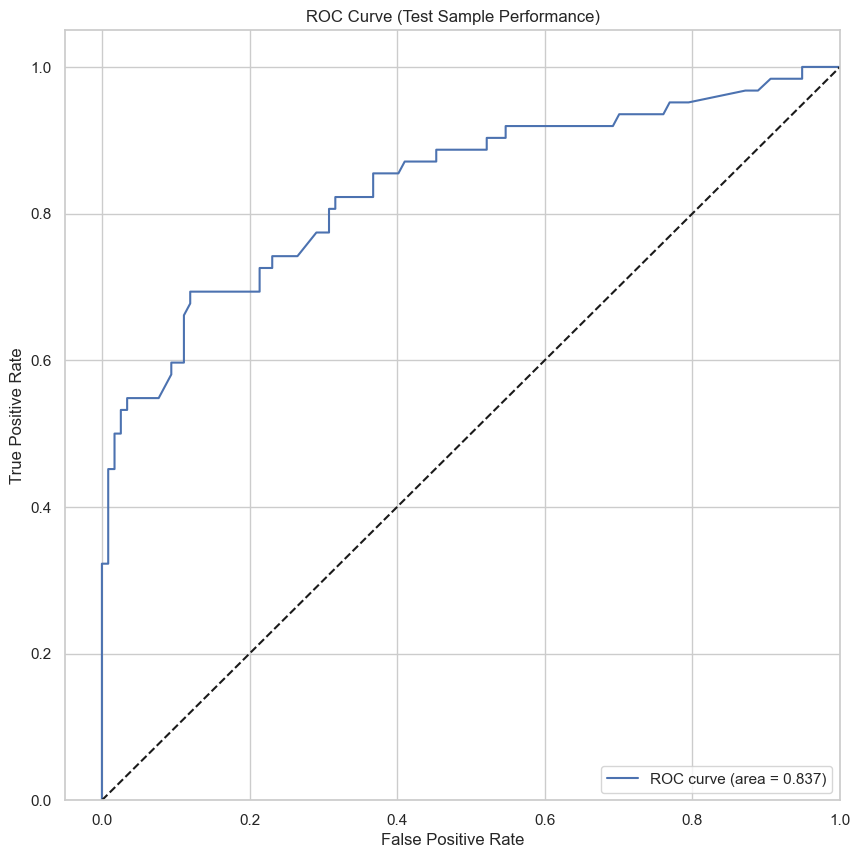

In [220]:
#Visualizing the model's ROC curve (**source for graph code given below the plot)
from sklearn.metrics import roc_curve, auc
logreg.fit(X3, Y3)

y_test = Y3_test
X_test = X3_test
 
# Determine the false positive and true positive rates
FPR, TPR, _ = roc_curve(y_test, logreg.predict_proba(X_test)[:,1])
 
# Calculate the AUC

roc_auc = auc(FPR, TPR)
print ('ROC AUC: %0.3f' % roc_auc )
 
# Plot of a ROC curve
plt.figure(figsize=(10,10))
plt.plot(FPR, TPR, label='ROC curve (area = %0.3f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([-0.05, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve (Test Sample Performance)')
plt.legend(loc="lower right")
plt.show()

In [221]:
from sklearn.ensemble import RandomForestClassifier

cols=["Age", "Fare", "TravelAlone", "Pclass_1", "Pclass_2","Embarked_C","Embarked_S","Sex_male","IsMinor"] 
X=df_final[cols]
Y=df_final['Survived']

random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(X, Y)
random_forest.score(X, Y)

0.9797979797979798

In [222]:
final_test_RF=final_test[cols]
Y_pred_RF = random_forest.predict(final_test_RF)

In [223]:
submission = pd.DataFrame({
        "PassengerId": test_df["PassengerId"],
        "Survived": Y_pred_RF
    })
submission.to_csv('titanic.csv', index=False)